<h2 align='center'> Titanic </h2>  

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this datasets,I will be looking at the impact of age, sex, ticket class on the survival chances of people boarded on the ship.

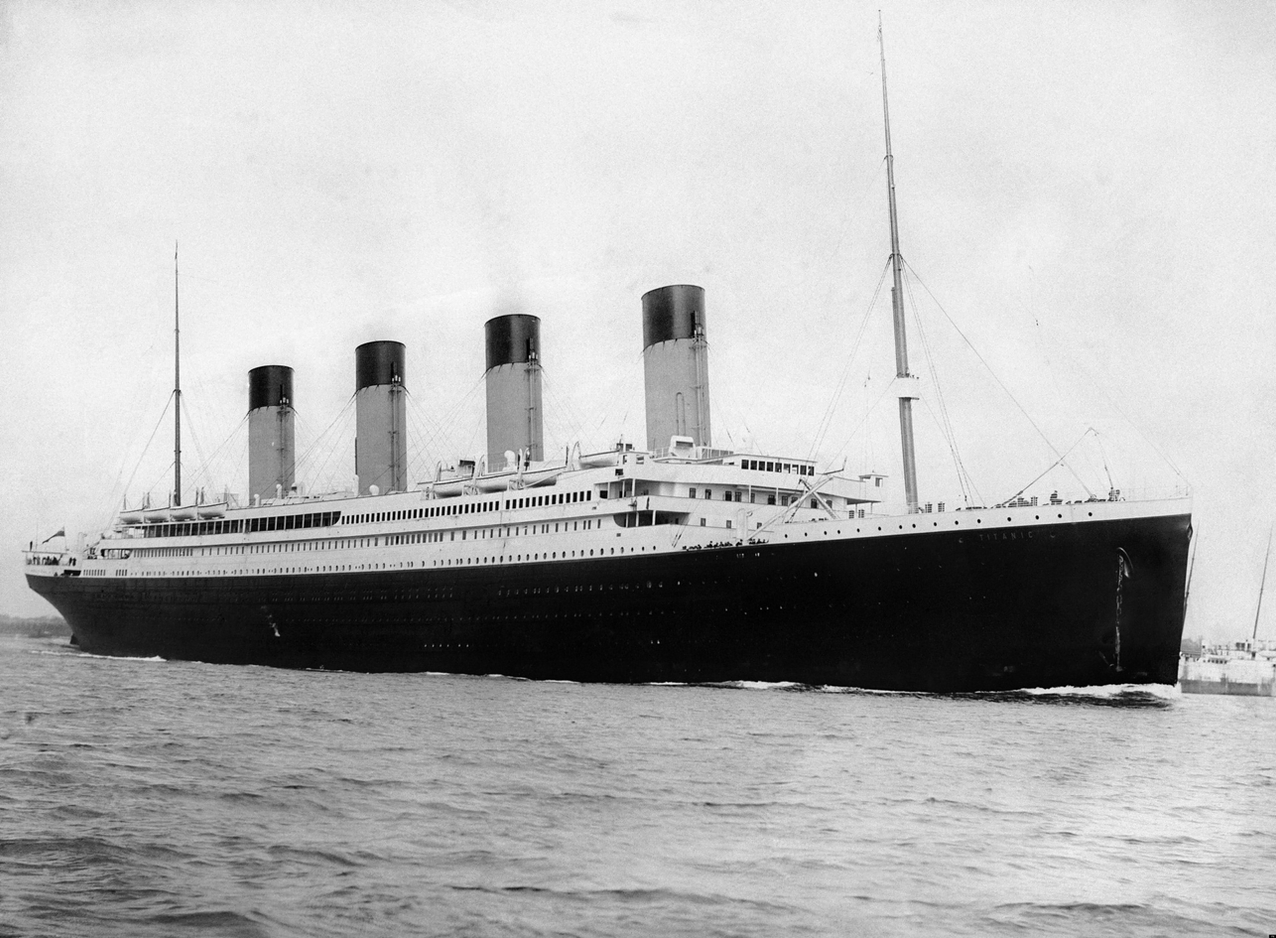

# Importing the dataset and required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv(r"C:\Users\AkashKumarJha\OneDrive - AIMO Marketing Services LLP\Desktop\titanic.csv")
titanic.head(3)

,Ticket,Name,PassengerId,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,A/5 21171,"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,7.2500,S,NaN
1,PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,Yes,1,female,38.0,1,0,71.2833,C,C
2,STON/O2. 3101282,"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,7.9250,S,NaN


# Analysing the data

In [3]:
titanic.shape # Checking number of rows and columns

(891, 12)

In [4]:
titanic.isnull().sum()  # As we can see in age,embarked and deck columns we have some null values.

Ticket           0
Name             0
PassengerId      0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
deck           688
dtype: int64

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ticket       891 non-null    object 
 1   Name         891 non-null    object 
 2   PassengerId  891 non-null    int64  
 3   survived     891 non-null    object 
 4   pclass       891 non-null    int64  
 5   sex          891 non-null    object 
 6   age          714 non-null    float64
 7   sibsp        891 non-null    int64  
 8   parch        891 non-null    int64  
 9   fare         891 non-null    float64
 10  embarked     889 non-null    object 
 11  deck         203 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.describe(include= "O") # As we can see in survived and sex columns there are 4 unique value which is not possible.

,Ticket,Name,survived,sex,embarked,deck
count,891,891,891,891,889,203
unique,681,891,4,4,3,7
top,347082,"Braund, Mr. Owen Harris",0,male,S,C
freq,7,1,522,567,644,59


In [8]:
titanic["survived"].unique()     # Either survived column values should be 0 and 1 or it should be Yes or No.

array(['0', 'Yes', '1', 'No'], dtype=object)

In [9]:
titanic["sex"].unique()       # same in sex column it should be 0 and 1 or it should be Yes or No.

array(['male', 'female', '1', '0'], dtype=object)

 # Cleaning our datasets

### Some columns like PassengerId, Name, Ticket, Cabin and deck are strings, we cannot categorize those columns and also survived column have no dependency on these columns so we will remove those columns. 

In [10]:
titanic.drop(["PassengerId","Ticket","Name","deck"],axis=1,inplace=True)
titanic.head(7)         

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,Yes,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,No,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S


In [11]:
# Rounding fare column upto two decimals by using pandas round function
titanic["fare"] = titanic["fare"].round(2)
titanic["fare"]

0       7.25
1      71.28
2       7.92
3      53.10
4       8.05
       ...  
886    13.00
887    30.00
888    23.45
889    30.00
890     7.75
Name: fare, Length: 891, dtype: float64

In [12]:
titanic.pclass.unique()    

array([3, 1, 2], dtype=int64)

In [13]:
# In pclass column 1,2,3 not looking good so I am converting into 1st_class,2nd_class,3rd_class.
titanic["pclass"].replace(to_replace=[1,2,3],value=["1st_class","2nd_class","3rd_class"],inplace=True)

In [14]:
titanic.pclass.unique()

array(['3rd_class', '1st_class', '2nd_class'], dtype=object)

In [15]:
titanic["survived"].replace(to_replace=["Yes","No"],value=[0,1],inplace = True)       # Replacing Yes and No with 0 and 1  

In [16]:
titanic.survived.unique()         # As we can see clearly the datatype of survived column is in object type it must be integer 

array(['0', 0, '1', 1], dtype=object)

In [17]:
titanic["survived"]= titanic.survived.astype("int") 
titanic.info()                           # Now survived column changed object type to integer succesfully.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int32  
 1   pclass    891 non-null    object 
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 52.3+ KB


In [18]:
titanic["sex"].replace(to_replace=["1","0"],value=["male","female"],inplace = True) # Replacing 1 & 0 into male and female.

In [19]:
titanic.sex.unique()                      # Now we have only two unique data i.e male and female in sex column.

array(['male', 'female'], dtype=object)

### Dealing with missing values in age and embarked column


In [20]:
titanic.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [21]:
titanic["age"] = titanic.age.fillna(titanic.age.mean())
titanic.age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [22]:
titanic.embarked.unique()     # Checking unique values in emabarked column

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
titanic.embarked.info()        # Showing only two null values in emabarked column 

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: embarked
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


<Axes: xlabel='embarked', ylabel='count'>

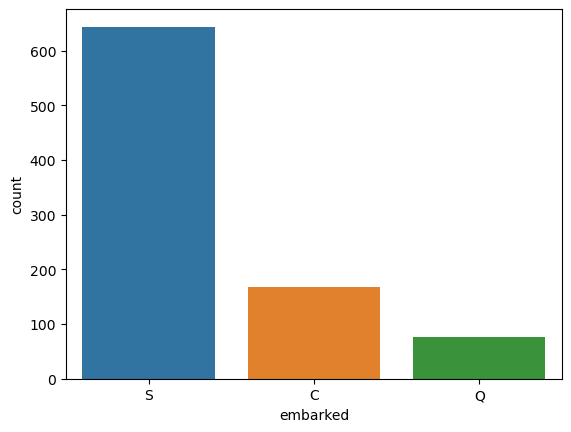

In [24]:
sns.countplot(data= titanic,x="embarked")   # As we can see maximum person embarked from S i.e southampton

In [25]:
titanic.embarked.value_counts()   

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [26]:
titanic["embarked"] = titanic.embarked.fillna("S")     # Repalcing null value with Sothampton i.e S
titanic.embarked.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: embarked
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


# Data Visualization(Using Seaborn, Matplotlib and pandas)

<Axes: xlabel='survived', ylabel='count'>

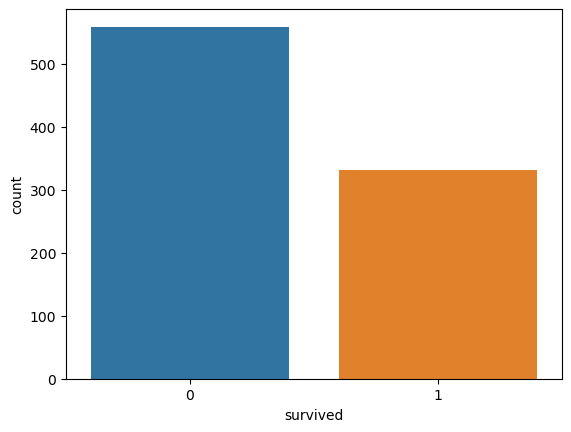

In [27]:
sns.countplot(data = titanic,x="survived")

In [28]:
titanic["survived"].value_counts()

0    559
1    332
Name: survived, dtype: int64

### From the above graph and doing value counts check it is clear that not many persons survived. Out of 891 persons only 350 survived.

In [29]:
titanic.groupby(["sex"])["survived"].value_counts()

sex     survived
female  1           213
        0           101
male    0           458
        1           119
Name: survived, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

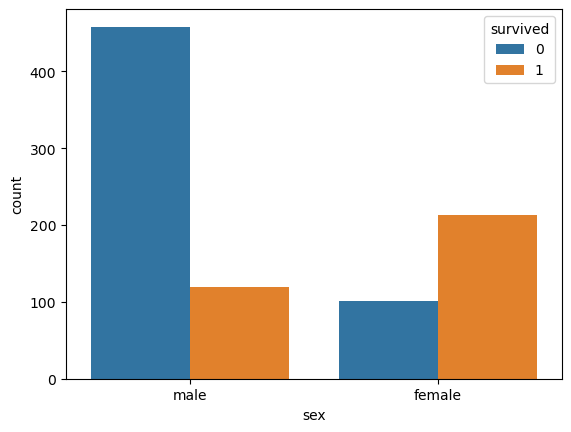

In [30]:
sns.countplot(data=titanic,x="sex",hue="survived")      

### From the above graph we can understand female survival rate is more than male's survival and it is important feature for our model 

<Axes: xlabel='pclass', ylabel='count'>

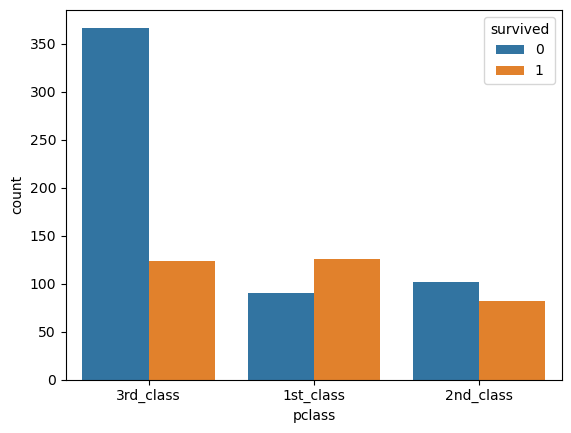

In [31]:
sns.countplot(data=titanic,x="pclass",hue="survived")   

### Although in the above graph 3rd class person counts more then 1st and 2nd class but if you check death rate which is higher in 3rd class compared to other class

In [32]:
titanic[titanic['survived']==1]['age']

2      26.000000
3      35.000000
5      29.699118
8      27.000000
9      14.000000
         ...    
884    25.000000
885    39.000000
886    27.000000
888    29.699118
890    32.000000
Name: age, Length: 332, dtype: float64

In [33]:
titanic[titanic['survived']==0]['age']

0      22.0
1      38.0
4      35.0
6      54.0
7       2.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: age, Length: 559, dtype: float64

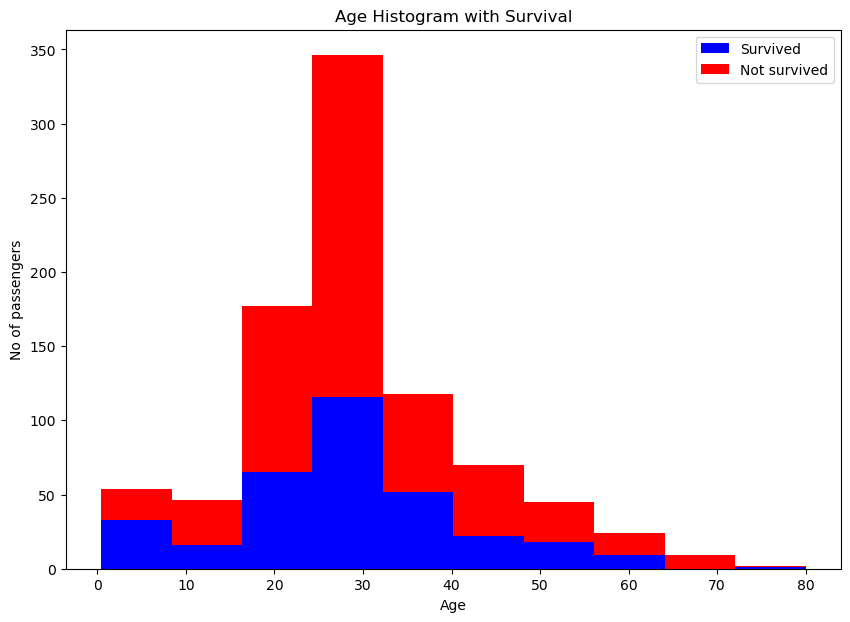

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(data = titanic,x =[titanic[titanic['survived']==1]['age'], titanic[titanic['survived']==0]['age']],stacked=True, color = ['b','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

###  As we can see from the above histogram maximum person who survived are in the 0-20 years age range and above 50 years, and between 20- 40 years person died most

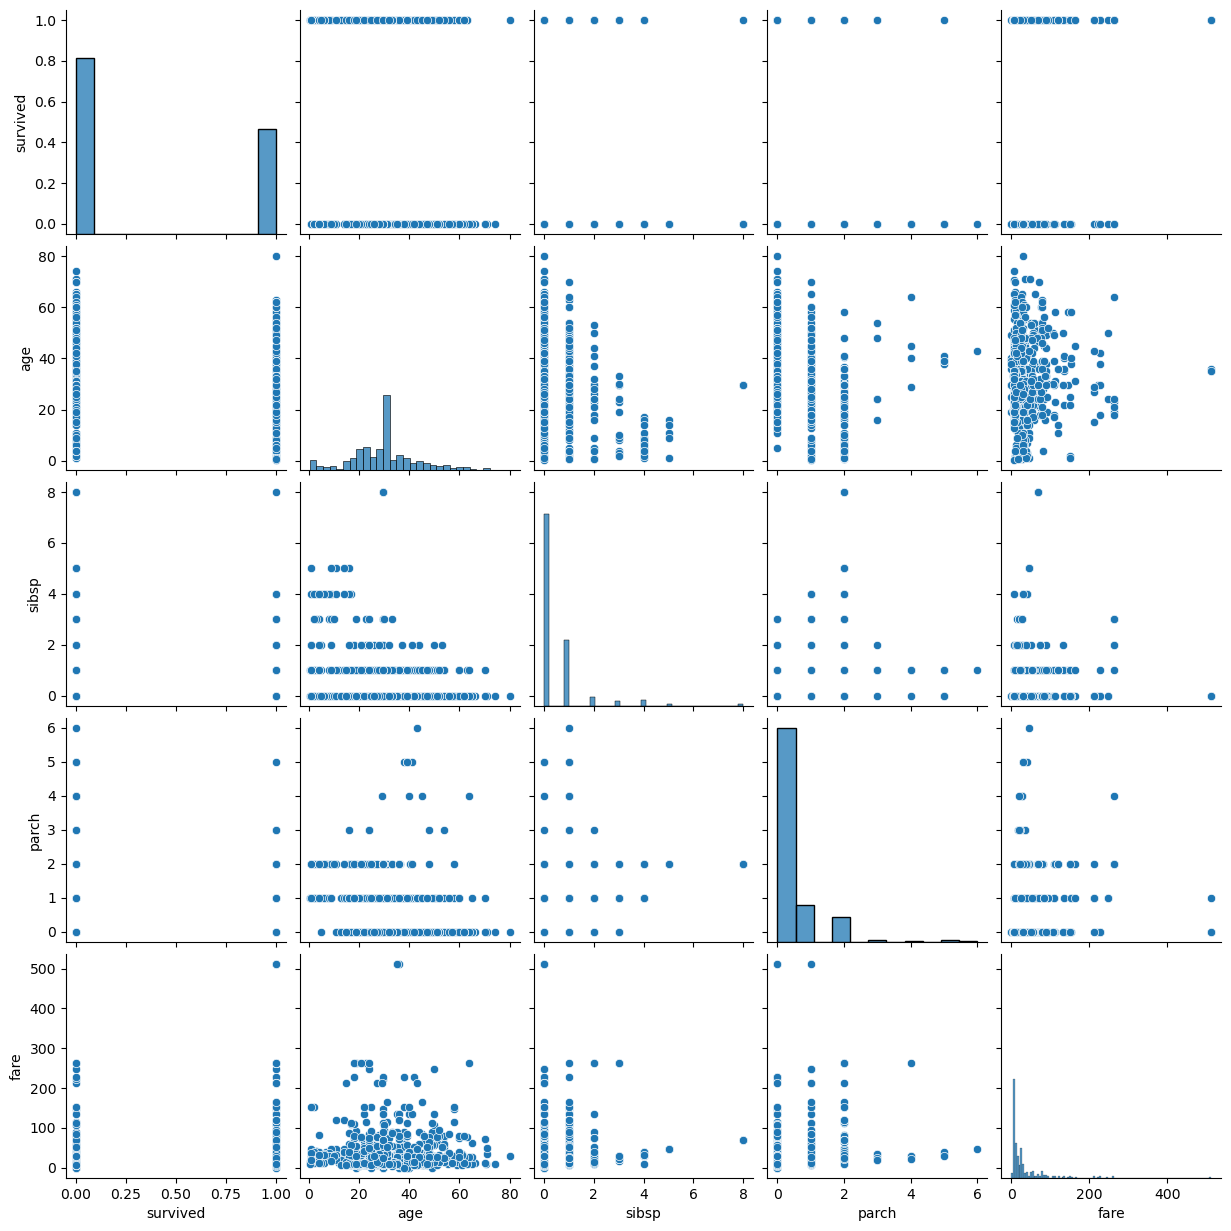

In [35]:
sns.pairplot(titanic)

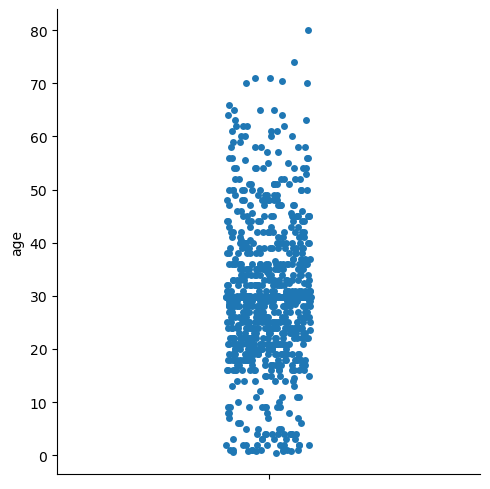

In [36]:
sns.catplot(data=titanic,y="age")

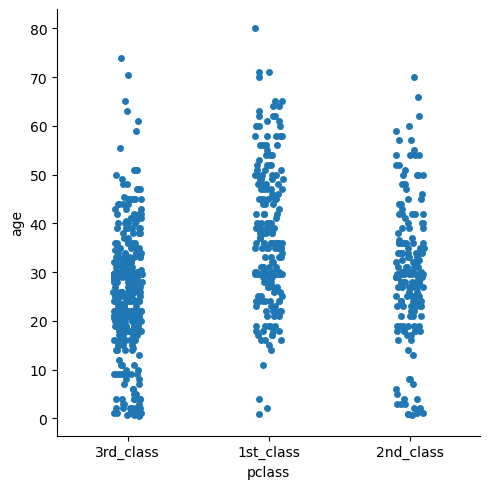

In [37]:
sns.catplot(data=titanic,y="age",x="pclass")

<h2 align='center'> Thank You </h2>  